## Analise Microdados Censo Escolar

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
dados = pd.read_csv('/content/drive/MyDrive/microdados_ed_basica_2021.csv', sep = ';', encoding = 'latin1')
dados.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,CO_MESORREGIAO,...,QT_TUR_FUND_AF,QT_TUR_MED,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
0,2021,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,1102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,1102,...,0.0,0.0,0.0,0.0,11.0,7.0,4.0,5.0,5.0,0.0
2,2021,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,1102,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,1102,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0
4,2021,Norte,1,Rondônia,RO,11,Alta Floresta D'Oeste,1100015,Leste Rondoniense,1102,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0


In [9]:
# Vendo quais estados estao nos dados
dados['SG_UF'].unique()

array(['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN',
       'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC',
       'RS', 'MS', 'MT', 'GO', 'DF'], dtype=object)

In [10]:
# Filtrando base para RJ
base = dados.query("SG_UF == 'RJ'")

In [11]:
# Passando para CSV -- Fiz para poder ter o arquivo men
base.to_csv("censo_escola_rj.csv", sep = ';', encoding='latin')

In [12]:
base = pd.read_csv('censo_escola_rj.csv', sep = ';', encoding = 'latin')
base.head()

,Unnamed: 0,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,...,QT_TUR_FUND_AF,QT_TUR_MED,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
0,133192,2021,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,10.0,20.0,0.0,0.0,8.0,0.0,8.0,20.0,20.0,0.0
1,133193,2021,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0
2,133194,2021,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,4.0,8.0,2.0,2.0,4.0,0.0,4.0,6.0,6.0,0.0
3,133195,2021,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,7.0,32.0,13.0,13.0,0.0,0.0,0.0,29.0,29.0,0.0
4,133196,2021,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,8.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0


### Olhando para numeros absolutos da Rede de Escolas e Abastecimento de Água de Rede Publica

In [13]:
# Tratando as informações de dependencia e agrupando para contar
dependencia = {1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4: 'Privada'}
agua_rede_publica = {1: 'Sim', 0: 'Não'}
base['IN_AGUA_REDE_PUBLICA'] = base['IN_AGUA_REDE_PUBLICA'].map(agua_rede_publica)
base['TP_DEPENDENCIA'] = base['TP_DEPENDENCIA'].map(dependencia)
base_dependencia = base.groupby(['TP_DEPENDENCIA', 'IN_AGUA_REDE_PUBLICA'])['NO_ENTIDADE'].count().reset_index()
base_dependencia

,TP_DEPENDENCIA,IN_AGUA_REDE_PUBLICA,NO_ENTIDADE
0,Estadual,Não,64
1,Estadual,Sim,1218
2,Federal,Não,4
3,Federal,Sim,56
4,Municipal,Não,727
5,Municipal,Sim,4629
6,Privada,Não,230
7,Privada,Sim,4516


In [14]:
def grafico_barra(base,colunax, colunay, hue2 = None):
    a= sns.catplot(data = base, x = colunax, y = colunay, kind = 'bar', hue = hue2, legend=False)

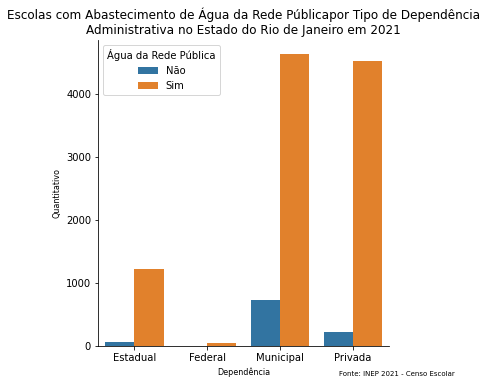

In [15]:
# Plotando Grafico
grafico_barra(base_dependencia,'TP_DEPENDENCIA', 'NO_ENTIDADE', 'IN_AGUA_REDE_PUBLICA')

plt.title('''Escolas com Abastecimento de Água da Rede Públicapor Tipo de Dependência
Administrativa no Estado do Rio de Janeiro em 2021''',
          size = 12, loc='center')
plt.suptitle('Fonte: INEP 2021 - Censo Escolar', x = 0.99, y = 0.05, size = 7)
plt.xlabel('Dependência', size = 8)
plt.ylabel('Quantitativo', size = 8)
plt.legend(title = 'Água da Rede Pública') # Legenda dentro do seaborn

### Dependencia e Aprendizagem

In [16]:
## Aprendizagem por Dependência
internet_aprendizagem = {0: 'Não', 1: 'Sim'}
base['IN_INTERNET_APRENDIZAGEM'] = base['IN_INTERNET_APRENDIZAGEM'].map(internet_aprendizagem)
base_internet_aprendizagem = base.groupby(['TP_DEPENDENCIA', 'IN_INTERNET_APRENDIZAGEM'])['NO_ENTIDADE'].count().reset_index()
base_internet_aprendizagem

,TP_DEPENDENCIA,IN_INTERNET_APRENDIZAGEM,NO_ENTIDADE
0,Estadual,Não,434
1,Estadual,Sim,848
2,Federal,Não,7
3,Federal,Sim,53
4,Municipal,Não,3140
5,Municipal,Sim,2216
6,Privada,Não,1953
7,Privada,Sim,2793


In [17]:
# Teste
#base_internet_aprendizagem['porcentagem'] = round(base_internet_aprendizagem['NO_ENTIDADE'] / sum(base_internet_aprendizagem['NO_ENTIDADE']),2)*100
#base_internet_aprendizagem

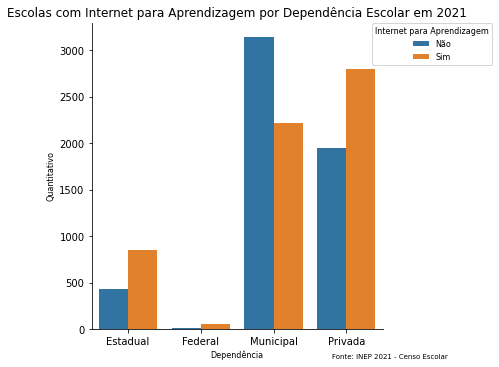

In [18]:
# Grafico Aprendizagem
a = grafico_barra(base_internet_aprendizagem, 'TP_DEPENDENCIA', 'NO_ENTIDADE', 'IN_INTERNET_APRENDIZAGEM')
plt.title('Escolas com Internet para Aprendizagem por Dependência Escolar em 2021', loc = 'center')
plt.suptitle('Fonte: INEP 2021 - Censo Escolar', x = 0.99, y = 0.05, size = 7)
plt.xlabel('Dependência', size = 8)
plt.ylabel('Quantitativo', size = 8)
plt.legend(title = 'Internet para Aprendizagem', bbox_to_anchor=(0.95, 0.85), fontsize = 8, title_fontsize = 8) # Posição da legenda

##### Escolas Totais sem Internet para aprendizagem

In [19]:
escolas_aprendizagem_total = base['IN_INTERNET_APRENDIZAGEM'].value_counts().reset_index()
escolas_aprendizagem_total['Porcentagem'] = round(escolas_aprendizagem_total['IN_INTERNET_APRENDIZAGEM'] / sum(escolas_aprendizagem_total['IN_INTERNET_APRENDIZAGEM'])*100,2)

In [20]:
escolas_aprendizagem_total
print('48,36% das Escolas não possuem internet para aprendizagem')

48,36% das Escolas não possuem internet para aprendizagem


### Esgoto nas escolas do Estado

In [21]:
base_esgoto = base['IN_ESGOTO_INEXISTENTE'].value_counts().reset_index() # Olhando os dados de esgotamento

In [22]:
# Preparando a porcentagem
base_esgoto['Porcentagem'] = round(base_esgoto['IN_ESGOTO_INEXISTENTE'] / sum(base_esgoto['IN_ESGOTO_INEXISTENTE'])*100,2)
print('0,32% das Escolas te esgoto inexistente')

0,32% das Escolas te esgoto inexistente


In [23]:
base_esgoto

,index,IN_ESGOTO_INEXISTENTE,Porcentagem
0,0.0,11407,99.68
1,1.0,37,0.32


In [24]:
esgoto_inexistente = base.query("IN_ESGOTO_INEXISTENTE == 1")

In [25]:
esgoto_inexistente.groupby(['NO_MUNICIPIO','TP_DEPENDENCIA'])['IN_ESGOTO_INEXISTENTE'].count().reset_index().sort_values(by = 'IN_ESGOTO_INEXISTENTE', ascending = False).head()

,NO_MUNICIPIO,TP_DEPENDENCIA,IN_ESGOTO_INEXISTENTE
24,São Gonçalo,Privada,3
13,Magé,Municipal,3
4,Campos dos Goytacazes,Privada,2
21,Rio de Janeiro,Privada,2
14,Maricá,Privada,2


In [26]:
print('Os Municipios com maior numero de escolas com Esgotamento Inexistente são São Gonçalo e Magé, com 3 Escolas Cada')

Os Municipios com maior numero de escolas com Esgotamento Inexistente são São Gonçalo e Magé, com 3 Escolas Cada


## Analisando dados para baixada Fluminense

In [27]:
base['NO_MUNICIPIO'].unique() # Observando quais são os municipios

array(['Angra dos Reis', 'Aperibé', 'Araruama', 'Areal',
       'Armação dos Búzios', 'Arraial do Cabo', 'Barra do Piraí',
       'Barra Mansa', 'Belford Roxo', 'Bom Jardim',
       'Bom Jesus do Itabapoana', 'Cabo Frio', 'Cachoeiras de Macacu',
       'Cambuci', 'Carapebus', 'Comendador Levy Gasparian',
       'Campos dos Goytacazes', 'Cantagalo', 'Cardoso Moreira', 'Carmo',
       'Casimiro de Abreu', 'Conceição de Macabu', 'Cordeiro',
       'Duas Barras', 'Duque de Caxias', 'Engenheiro Paulo de Frontin',
       'Guapimirim', 'Iguaba Grande', 'Itaboraí', 'Itaguaí', 'Italva',
       'Itaocara', 'Itaperuna', 'Itatiaia', 'Japeri', 'Laje do Muriaé',
       'Macaé', 'Macuco', 'Magé', 'Mangaratiba', 'Maricá', 'Mendes',
       'Mesquita', 'Miguel Pereira', 'Miracema', 'Natividade',
       'Nilópolis', 'Niterói', 'Nova Friburgo', 'Nova Iguaçu',
       'Paracambi', 'Paraíba do Sul', 'Paraty', 'Paty do Alferes',
       'Petrópolis', 'Pinheiral', 'Piraí', 'Porciúncula', 'Porto Real',
       'Q

In [28]:
# Filtrando os dados
baixada = base.query("CO_MUNICIPIO == (3301702, 3302502, 3300456,3302007,3302270,3303203,3303500,3303609,3304144,3305554,3301850,3305109,3302858)")

In [29]:
baixada['NO_MUNICIPIO'].unique()

array(['Belford Roxo', 'Duque de Caxias', 'Guapimirim', 'Itaguaí',
       'Japeri', 'Magé', 'Mesquita', 'Nilópolis', 'Nova Iguaçu',
       'Paracambi', 'Queimados', 'São João de Meriti', 'Seropédica'],
      dtype=object)

In [30]:
baixada.shape

(2506, 371)

In [31]:
baixada_dependencia = baixada.groupby(['TP_DEPENDENCIA'])['NO_ENTIDADE'].count().reset_index()

In [32]:
baixada_dependencia

,TP_DEPENDENCIA,NO_ENTIDADE
0,Estadual,360
1,Federal,10
2,Municipal,907
3,Privada,1229


Text(0.99, 0.05, 'Fonte: INEP 2021 - Censo Escolar')

<Figure size 1152x504 with 0 Axes>

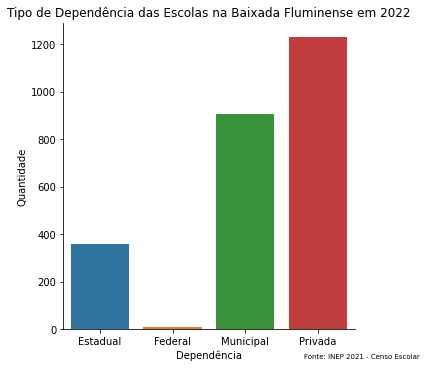

In [33]:
plt.figure(figsize=(16,7))
grafico_barra(baixada_dependencia,'TP_DEPENDENCIA', 'NO_ENTIDADE')
plt.title(label = 'Tipo de Dependência das Escolas na Baixada Fluminense em 2022')
plt.xlabel('Dependência')
plt.ylabel('Quantidade')
plt.suptitle('Fonte: INEP 2021 - Censo Escolar', x = 0.99, y = 0.05, size = 7)

In [34]:
# Internet para aprendizagem na Baixada
escolas_aprendizagem_total_baixada = baixada['IN_INTERNET_APRENDIZAGEM'].value_counts().reset_index()
escolas_aprendizagem_total_baixada['Porcentagem'] = round(escolas_aprendizagem_total_baixada['IN_INTERNET_APRENDIZAGEM'] / sum(escolas_aprendizagem_total_baixada['IN_INTERNET_APRENDIZAGEM'])*100,2)

In [35]:
escolas_aprendizagem_total_baixada

,index,IN_INTERNET_APRENDIZAGEM,Porcentagem
0,Não,1232,52.67
1,Sim,1107,47.33


In [36]:
print('52,67 % das Escolas da baixada não tem internet para aprendizagem')

52,67 % das Escolas da baixada não tem internet para aprendizagem


#### Água da Rede Publica nas escolas da Baixada
* IN_AGUA_REDE_PUBLICA

In [37]:
agua_rd_publica_baixada = baixada['IN_AGUA_REDE_PUBLICA'].value_counts().reset_index()
agua_rd_publica_baixada['Porcentagem'] = round(agua_rd_publica_baixada['IN_AGUA_REDE_PUBLICA'] / sum(agua_rd_publica_baixada['IN_AGUA_REDE_PUBLICA'])*100,2)
agua_rd_publica_baixada

,index,IN_AGUA_REDE_PUBLICA,Porcentagem
0,Sim,2033,86.92
1,Não,306,13.08


In [38]:
print('13,08% das Escolas da Baixada não é abastecida pela de Rede de Águas Públicas')

13,08% das Escolas da Baixada não é abastecida pela de Rede de Águas Públicas


In [39]:
biblioteca_sala_leitura = baixada['IN_BIBLIOTECA_SALA_LEITURA'].value_counts().reset_index()
biblioteca_sala_leitura['Porcentagem'] = round(biblioteca_sala_leitura['IN_BIBLIOTECA_SALA_LEITURA'] / sum(biblioteca_sala_leitura['IN_BIBLIOTECA_SALA_LEITURA'])*100,2)
biblioteca_sala_leitura

,index,IN_BIBLIOTECA_SALA_LEITURA,Porcentagem
0,1.0,1782,76.19
1,0.0,557,23.81


In [40]:
print('23,81 % das Escolas da Baixada Fluminense não tem Biblioteca ou Sala de Leituras')

23,81 % das Escolas da Baixada Fluminense não tem Biblioteca ou Sala de Leituras


In [41]:
# Agrupando as informações acima para poder contabilizar por municipio
sem_biblioteca_sala_leitura = baixada.query("IN_BIBLIOTECA_SALA_LEITURA == 0")

In [42]:
sem_biblioteca_sala_leitura = sem_biblioteca_sala_leitura.groupby(['NO_MUNICIPIO'])['IN_BIBLIOTECA_SALA_LEITURA'].count().reset_index().sort_values(by = 'IN_BIBLIOTECA_SALA_LEITURA', ascending = False)

In [43]:
sem_biblioteca_sala_leitura

,NO_MUNICIPIO,IN_BIBLIOTECA_SALA_LEITURA
1,Duque de Caxias,114
12,São João de Meriti,80
5,Magé,78
8,Nova Iguaçu,71
0,Belford Roxo,66
6,Mesquita,28
3,Itaguaí,24
7,Nilópolis,24
11,Seropédica,18
2,Guapimirim,17


#### Analisando dados sobre o Censo Escolar na Baixada Fluminense

In [44]:
base.head()

,Unnamed: 0,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,...,QT_TUR_FUND_AF,QT_TUR_MED,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
0,133192,2021,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,10.0,20.0,0.0,0.0,8.0,0.0,8.0,20.0,20.0,0.0
1,133193,2021,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0
2,133194,2021,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,4.0,8.0,2.0,2.0,4.0,0.0,4.0,6.0,6.0,0.0
3,133195,2021,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,7.0,32.0,13.0,13.0,0.0,0.0,0.0,29.0,29.0,0.0
4,133196,2021,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,8.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0


In [95]:
# Filtrando dados para baixada somente ativas
baixada = base.query('CO_MUNICIPIO == (3300456,3301702,3301850,3302007,3302270,3302502,3302858,3303203,3303500,3303609,3304144,3305109,3305554) & TP_SITUACAO_FUNCIONAMENTO == 1')
baixada['NO_MUNICIPIO'].unique()

array(['Belford Roxo', 'Duque de Caxias', 'Guapimirim', 'Itaguaí',
       'Japeri', 'Magé', 'Mesquita', 'Nilópolis', 'Nova Iguaçu',
       'Paracambi', 'Queimados', 'São João de Meriti', 'Seropédica'],
      dtype=object)

##### Escolas por Tipo de Dependência na Baixada Fluminense

In [102]:
dp_baixada = baixada['TP_DEPENDENCIA'].value_counts().reset_index().rename(columns = {'index' : 'Dependência', 'TP_DEPENDENCIA' : 'qtd'})
dp_baixada['porcentagem'] = round(dp_baixada['qtd'] / dp_baixada['qtd'].sum()*100,2)

In [103]:
dp_baixada

,Dependência,qtd,porcentagem
0,Privada,1109,47.41
1,Municipal,876,37.45
2,Estadual,345,14.75
3,Federal,9,0.38


In [57]:
import plotly.express as px


In [104]:
fig = px.bar(dp_baixada, x='qtd', y='Dependência', labels={'qtd' : 'Quantidade'},
             height = 300, width= 600, text_auto=True)
fig.update_layout(title_text='Quantidade de Escolas por Dependência na Baixada Fluminese')
fig.update_traces(textfont_size=8, textfont_color = '#e3e8cd')


In [106]:
# Grafico com Porcentagem
fig = px.pie(dp_baixada, values='porcentagem', names='Dependência', title='Quantidade de Escolas por Dependência na Baixada Fluminese',
             height = 400, width= 400, hole=.4)
fig